# ***REAL TIME SIGN LANGUAGE RECOGNITION - VGG16***

**LOAD DATASET**

In [ ]:
!unzip /content/drive/MyDrive/samples.zip

Streaming output truncated to the last 5000 lines.
  inflating: samples/X/1002.png      
  inflating: samples/X/1003.png      
  inflating: samples/X/1004.png      
  inflating: samples/X/1005.png      
  inflating: samples/X/1006.png      
  inflating: samples/X/1007.png      
  inflating: samples/X/1008.png      
  inflating: samples/X/1009.png      
  inflating: samples/X/1010.png      
  inflating: samples/X/1011.png      
  inflating: samples/X/1012.png      
  inflating: samples/X/1013.png      
  inflating: samples/X/1014.png      
  inflating: samples/X/1015.png      
  inflating: samples/X/1016.png      
  inflating: samples/X/1017.png      
  inflating: samples/X/1018.png      
  inflating: samples/X/1019.png      
  inflating: samples/X/1020.png      
  inflating: samples/X/1021.png      
  inflating: samples/X/1022.png      
  inflating: samples/X/1023.png      
  inflating: samples/X/1024.png      
  inflating: samples/X/1025.png      
  inflating: samples/X/1026.png      

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import skimage.transform
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
batch_size = 16
image_size = 64  # Adjusted to match VGG16 input size
target_dimensions = (image_size, image_size, 3)
num_classes = 29  # Update to 29 classes
epochs = 50
train_len = 58000
train_dir = '/content/samples'

In [ ]:
X = np.empty((train_len, image_size, image_size, 3), dtype=np.float32)
y = np.empty((train_len,), dtype=np.int64)
cnt = 0
label_mapping = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18,
    'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26,
    'nothing': 27, 'space': 28
}

In [ ]:
for folderName in os.listdir(train_dir):
    if not folderName.startswith('.'):
        label = label_mapping.get(folderName, 29)
        for image_filename in os.listdir(train_dir + '/' + folderName):
            img_file = cv2.imread(train_dir + '/' + folderName + '/' + image_filename)
            if img_file is not None:
                img_file = skimage.transform.resize(img_file, (image_size, image_size, 3))
                img_arr = np.asarray(img_file).reshape((-1, image_size, image_size, 3))
                X[cnt] = img_arr
                y[cnt] = label
                cnt += 1
print('Done loading data')

Done loading data


**Splitting the Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
y_cat_train = to_categorical(y_train, num_classes)
y_cat_test = to_categorical(y_test, num_classes)
print('Splitting complete')

Splitting complete


**Building the VGG16 Model**

In [ ]:
# Build the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=target_dimensions)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Earlystopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)
checkpoint_filepath = os.path.join('checkpoints', 'vgg16.{epoch:03d}-{val_loss:.3f}-best.weights.h5')
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True
)


start training the Model

In [ ]:
history = model.fit(X_train, y_cat_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=2,
                    validation_data=(X_test, y_cat_test),
                    callbacks=[early_stop, model_checkpoint_callback])


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.99902, saving model to checkpoints/vgg16.001-0.008-best.weights.h5
2538/2538 - 46s - 18ms/step - accuracy: 0.9178 - loss: 0.3269 - val_accuracy: 0.9990 - val_loss: 0.0085
Epoch 2/50

Epoch 2: val_accuracy improved from 0.99902 to 0.99937, saving model to checkpoints/vgg16.002-0.004-best.weights.h5
2538/2538 - 70s - 28ms/step - accuracy: 0.9883 - loss: 0.0428 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 3/50

Epoch 3: val_accuracy improved from 0.99937 to 0.99971, saving model to checkpoints/vgg16.003-0.002-best.weights.h5
2538/2538 - 41s - 16ms/step - accuracy: 0.9915 - loss: 0.0296 - val_accuracy: 0.9997 - val_loss: 0.0017
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.99971
2538/2538 - 33s - 13ms/step - accuracy: 0.9923 - loss: 0.0253 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.99971
2538/2538 - 32s - 13ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy:

**Save The Model**

In [ ]:
model.save('ASL_vgg16.h5')
print('Done training')

Done training


In [ ]:
metrics = pd.DataFrame(history.history)

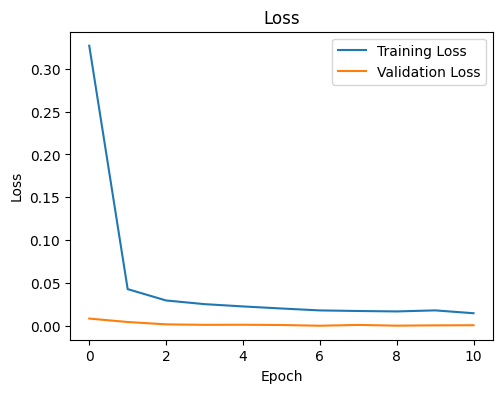

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

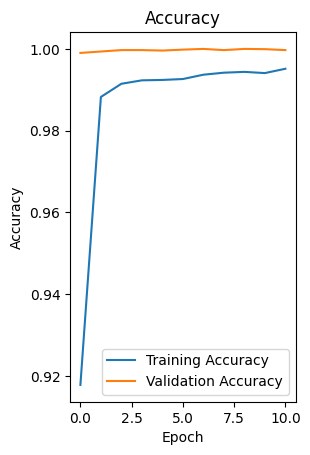

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(metrics['accuracy'], label='Training Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

544/544 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       1.00      1.00      1.00       600
           2       1.00      1.00      1.00       600
           3       1.00      1.00      1.00       600
           4       1.00      1.00      1.00       600
           5       1.00      1.00      1.00       600
           6       1.00      1.00      1.00       600
           7       1.00      1.00      1.00       600
           8       1.00      1.00      1.00       600
           9       1.00      1.00      1.00       600
          10       1.00      1.00      1.00       600
          11       1.00      1.00      1.00       600
          12       1.00      1.00      1.00       600
          13       1.00      1.00      1.00       600
          14       1.00      1.00      1.00       600
          15       1.00      1.00      1.00       600
          16       1.00      1.00      1.00       600
          17       1.00    

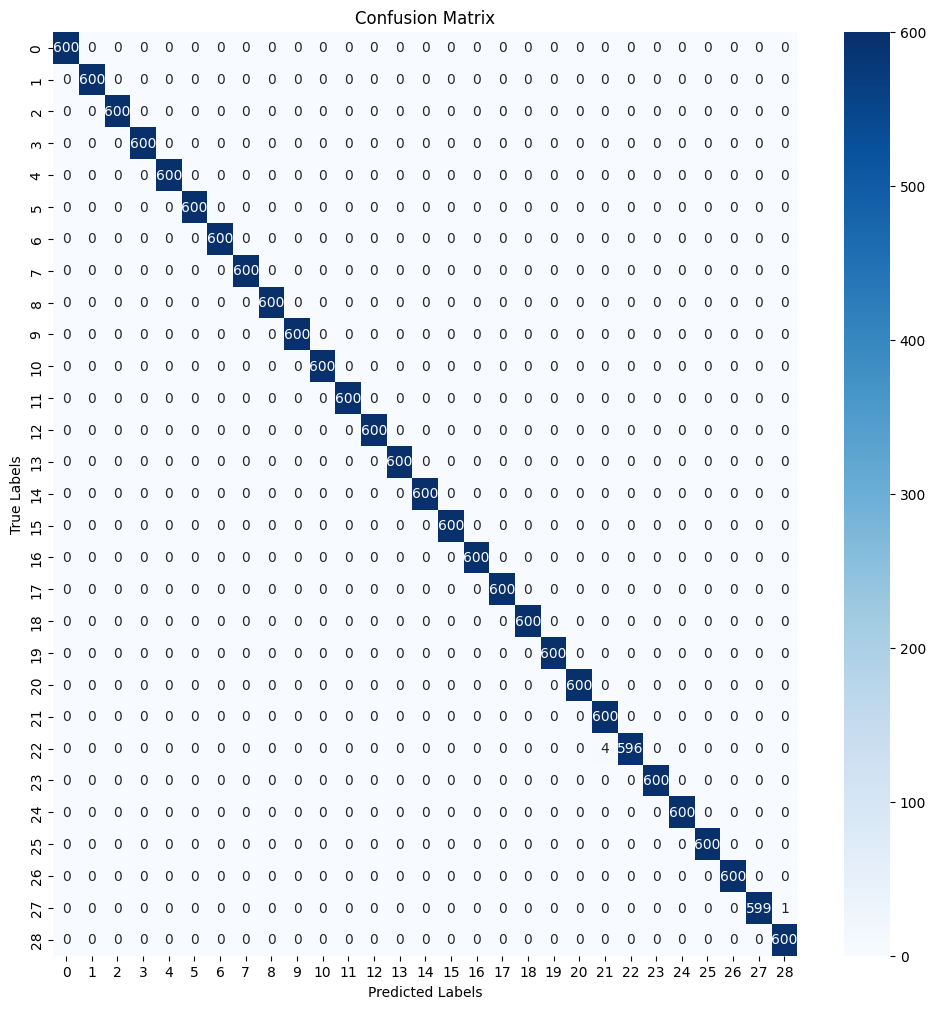

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_cat_test, verbose=0)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 99.97%
